Perform a Multilayer perceptron neural network to classify flower type. Utilize number of hidden layers, 5 and 200 to 400 iterations with a learning rate. Try with different loss functions/ activation functions such as MSE, Cross entropy, sigmoid, tanh, ReLU along with different optimizers GD, SGD, Adam. Illustrate the result with performance metrics and observe Weight, Loss curve and accuracy curve.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv('iris.csv')

X = df.drop('species', axis=1)
y = df['species']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
experiments = [
    ("logistic", "adam"),
    ("tanh", "sgd"),
    ("relu", "adam")
]

loss_curves = {}

In [6]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [7]:
for act, opt in experiments:
    print(f"\n--- Testing Model: Activation={act}, Optimizer={opt} ---")

    clf = MLPClassifier(hidden_layer_sizes=(5,),
                        max_iter=400,
                        learning_rate_init=0.01,
                        activation=act,
                        solver=opt,
                        random_state=42)

    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    loss_curves[f"{act}-{opt}"] = clf.loss_curve_


--- Testing Model: Activation=logistic, Optimizer=adam ---


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


--- Testing Model: Activation=tanh, Optimizer=sgd ---


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


--- Testing Model: Activation=relu, Optimizer=adam ---
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



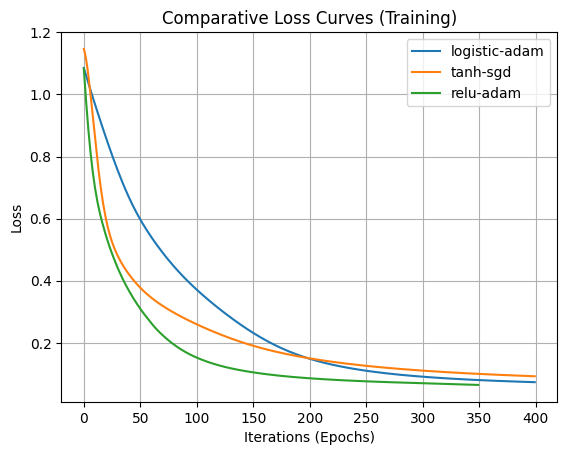

In [8]:
for label, loss in loss_curves.items():
    plt.plot(loss, label=label)

plt.title("Comparative Loss Curves (Training)")
plt.xlabel("Iterations (Epochs)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()